In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import glob
import cv2
import os


2.0.0


In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
sampleSabmission = pd.read_csv("sampleSubmission.csv")

In [3]:
train.head(3)


,Id,X,Y,Z,Time
0,1,2481900,528800,586,1.299872
1,2,2488400,530200,11686,1.679518
2,3,2495000,518400,6386,1.952326


In [4]:
test.head(3)

,Id,X,Y,Z
0,1,2488500,511100,11286
1,2,2471600,529600,2386
2,3,2483100,521300,10986


In [5]:
sampleSabmission.head(3)

,Id,Predicted
0,1,0
1,2,0
2,3,0


In [6]:
X_train_orig = train[["X", "Y", "Z"]]
X_test_orig  = test[["X", "Y", "Z"]]
Y_train_orig = train["Time"]

X_train_orig = np.asarray(X_train_orig)
Y_train_orig = np.asarray(Y_train_orig)
X_test_orig = np.asarray(X_test_orig)

print(X_train_orig.shape)
print(X_test_orig.shape)
print(Y_train_orig.shape)


(1086557, 3)
(1086558, 3)
(1086557,)


Let us now scale the data. We will use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn library.

The transformation is given by:

> X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) 

> X_scaled = X_std * (max - min) + min

In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
scaler.fit(X_train_orig)
print("Maximum values of X_train (X, Y, Z): " + str(scaler.data_max_))
print("Minimum values of X_train (X, Y, Z): " + str(scaler.data_min_))

# Use the same transform for both train and test data:
X_train_norm = scaler.transform(X_train_orig)
X_test_norm = scaler.transform(X_test_orig)

Maximum values of X_train (X, Y, Z): [2496500.  530500.   12986.]
Minimum values of X_train (X, Y, Z): [ 2.469e+06  5.010e+05 -2.140e+02]


In [8]:
# create training and testing vars

X_train, X_val, y_train, y_val = train_test_split(X_train_norm, Y_train_orig, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(869245, 3)
(869245,)
(217312, 3)
(217312,)


In [9]:
model = keras.Sequential([
    keras.layers.Dense(9, input_dim=3, activation='elu'),
    keras.layers.Dense(27, activation='elu'),
    keras.layers.Dense(64, activation="elu"),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(16, activation="elu"),
    keras.layers.Dense(16, activation="elu"),
    keras.layers.Dense(8, activation="elu"),
    keras.layers.Dense(8, activation="elu"),
    keras.layers.Dense(4, activation="elu"),
    keras.layers.Dense(4, activation="elu"),
    keras.layers.Dense(2, activation="elu"),
    keras.layers.Dense(2, activation="elu"),
    keras.layers.Dense(1, activation="linear")
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1

In [10]:
model.compile(optimizer='adam',
              loss='MSE',
              metrics=['MAE'])

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1024, epochs=300)

Train on 869245 samples, validate on 217312 samples
Epoch 1/300
869245/869245 [==============================] - 3s 4us/sample - loss: 0.0612 - MAE: 0.1021 - val_loss: 8.0695e-04 - val_MAE: 0.0218
Epoch 2/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.8333e-04 - MAE: 0.0162 - val_loss: 2.6096e-04 - val_MAE: 0.0120
Epoch 3/300
869245/869245 [==============================] - 2s 3us/sample - loss: 2.7213e-04 - MAE: 0.0121 - val_loss: 1.7154e-04 - val_MAE: 0.0096
Epoch 4/300
869245/869245 [==============================] - 2s 3us/sample - loss: 2.1358e-04 - MAE: 0.0106 - val_loss: 1.3028e-04 - val_MAE: 0.0086
Epoch 5/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.8735e-04 - MAE: 0.0098 - val_loss: 1.2114e-04 - val_MAE: 0.0085
Epoch 6/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.3817e-04 - MAE: 0.0087 - val_loss: 9.2032e-05 - val_MAE: 0.0073
Epoch 7/300
869245/869245 [==============================]

869245/869245 [==============================] - 2s 3us/sample - loss: 2.2579e-05 - MAE: 0.0036 - val_loss: 3.5935e-05 - val_MAE: 0.0048
Epoch 56/300
869245/869245 [==============================] - 2s 3us/sample - loss: 2.3359e-05 - MAE: 0.0037 - val_loss: 1.2619e-05 - val_MAE: 0.0026
Epoch 57/300
869245/869245 [==============================] - 2s 3us/sample - loss: 2.3800e-05 - MAE: 0.0037 - val_loss: 4.9763e-05 - val_MAE: 0.0057
Epoch 58/300
869245/869245 [==============================] - 2s 3us/sample - loss: 2.3118e-05 - MAE: 0.0036 - val_loss: 1.6499e-05 - val_MAE: 0.0030
Epoch 59/300
869245/869245 [==============================] - 2s 3us/sample - loss: 2.1645e-05 - MAE: 0.0035 - val_loss: 1.7561e-05 - val_MAE: 0.0033
Epoch 60/300
869245/869245 [==============================] - 2s 3us/sample - loss: 2.3549e-05 - MAE: 0.0037 - val_loss: 1.8982e-05 - val_MAE: 0.0034
Epoch 61/300
869245/869245 [==============================] - 2s 3us/sample - loss: 2.1273e-05 - MAE: 0.0035 - va

869245/869245 [==============================] - 2s 3us/sample - loss: 1.4720e-05 - MAE: 0.0029 - val_loss: 7.8340e-06 - val_MAE: 0.0021
Epoch 110/300
869245/869245 [==============================] - 3s 3us/sample - loss: 1.4624e-05 - MAE: 0.0029 - val_loss: 6.3024e-06 - val_MAE: 0.0019
Epoch 111/300
869245/869245 [==============================] - 3s 3us/sample - loss: 1.3665e-05 - MAE: 0.0028 - val_loss: 5.2649e-05 - val_MAE: 0.0067
Epoch 112/300
869245/869245 [==============================] - 3s 3us/sample - loss: 1.4672e-05 - MAE: 0.0029 - val_loss: 1.7500e-05 - val_MAE: 0.0034
Epoch 113/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.4096e-05 - MAE: 0.0029 - val_loss: 1.2410e-05 - val_MAE: 0.0026
Epoch 114/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.3769e-05 - MAE: 0.0028 - val_loss: 7.5339e-06 - val_MAE: 0.0021
Epoch 115/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.4761e-05 - MAE: 0.002

869245/869245 [==============================] - 2s 3us/sample - loss: 1.1611e-05 - MAE: 0.0025 - val_loss: 4.7333e-06 - val_MAE: 0.0016
Epoch 164/300
869245/869245 [==============================] - 2s 3us/sample - loss: 9.6433e-06 - MAE: 0.0024 - val_loss: 2.7014e-05 - val_MAE: 0.0045
Epoch 165/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.0449e-05 - MAE: 0.0024 - val_loss: 4.2584e-06 - val_MAE: 0.0016
Epoch 166/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.0368e-05 - MAE: 0.0024 - val_loss: 8.4961e-06 - val_MAE: 0.0023
Epoch 167/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.0452e-05 - MAE: 0.0025 - val_loss: 2.8660e-05 - val_MAE: 0.0044
Epoch 168/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.0200e-05 - MAE: 0.0024 - val_loss: 1.1637e-05 - val_MAE: 0.0028
Epoch 169/300
869245/869245 [==============================] - 2s 3us/sample - loss: 1.0613e-05 - MAE: 0.002

869245/869245 [==============================] - 2s 3us/sample - loss: 8.5876e-06 - MAE: 0.0022 - val_loss: 2.2070e-05 - val_MAE: 0.0040
Epoch 218/300
869245/869245 [==============================] - 2s 3us/sample - loss: 8.2352e-06 - MAE: 0.0022 - val_loss: 6.8178e-06 - val_MAE: 0.0020
Epoch 219/300
869245/869245 [==============================] - 2s 3us/sample - loss: 9.3566e-06 - MAE: 0.0023 - val_loss: 3.6589e-06 - val_MAE: 0.0015
Epoch 220/300
869245/869245 [==============================] - 3s 3us/sample - loss: 8.1607e-06 - MAE: 0.0022 - val_loss: 1.0319e-05 - val_MAE: 0.0027
Epoch 221/300
869245/869245 [==============================] - 3s 3us/sample - loss: 8.8540e-06 - MAE: 0.0022 - val_loss: 4.5342e-06 - val_MAE: 0.0016
Epoch 222/300
869245/869245 [==============================] - 3s 3us/sample - loss: 8.5912e-06 - MAE: 0.0022 - val_loss: 5.2964e-06 - val_MAE: 0.0018
Epoch 223/300
869245/869245 [==============================] - 3s 3us/sample - loss: 8.5439e-06 - MAE: 0.002

869245/869245 [==============================] - 2s 3us/sample - loss: 7.6384e-06 - MAE: 0.0021 - val_loss: 2.1075e-05 - val_MAE: 0.0039
Epoch 272/300
869245/869245 [==============================] - 2s 3us/sample - loss: 7.5633e-06 - MAE: 0.0021 - val_loss: 7.9764e-06 - val_MAE: 0.0021
Epoch 273/300
869245/869245 [==============================] - 2s 3us/sample - loss: 7.3089e-06 - MAE: 0.0021 - val_loss: 3.7220e-06 - val_MAE: 0.0015
Epoch 274/300
869245/869245 [==============================] - 2s 3us/sample - loss: 7.3015e-06 - MAE: 0.0021 - val_loss: 1.8515e-05 - val_MAE: 0.0035
Epoch 275/300
869245/869245 [==============================] - 2s 3us/sample - loss: 8.1102e-06 - MAE: 0.0021 - val_loss: 8.5533e-06 - val_MAE: 0.0022
Epoch 276/300
869245/869245 [==============================] - 2s 3us/sample - loss: 6.9810e-06 - MAE: 0.0020 - val_loss: 1.1297e-05 - val_MAE: 0.0027
Epoch 277/300
869245/869245 [==============================] - 2s 3us/sample - loss: 7.4179e-06 - MAE: 0.002

In [12]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=0)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 3.190665888416381e-06

Test accuracy: 0.0014041917


In [13]:
print('\nhistory dict:', history.history.keys())


history dict: dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])


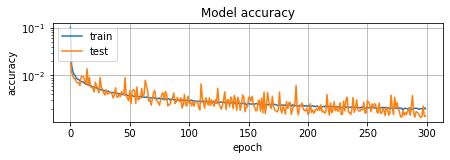

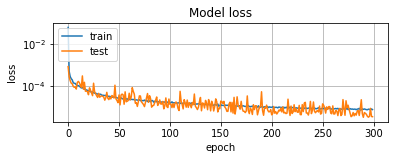

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.subplot(2, 1, 1)
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [16]:
# Generate predictions
predictions = model.predict(X_test_norm)

In [17]:
mySubmission = sampleSabmission
mySubmission["Predicted"] = predictions

mySubmission.head()

filename = 'IvanPredictions_11.csv'

mySubmission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: IvanPredictions_11.csv
